<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 생성과정이 알려져 있는 경우의 학습과정을 살펴봅시다
아래 데이터는 y= 3+x1-2*x2의 식으로 만들어져 있습니다. 


In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation
# 깃허브의 데이터 부르기
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트
dat = pd.read_csv('/content/public/trivial.csv')
dat = np.array(dat)
x=dat[:,0:2]
y=dat[:,2]
print(x.shape, y.shape)


Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 75 (delta 28), reused 40 (delta 10), pack-reused 0
Unpacking objects: 100% (75/75), done.
(1000, 2) (1000,)


# 데이터를 훈련과 검증 셋으로 나누어 줍니다 

In [2]:

x_train=x[0:800,];x_test=x[800:1000,]
y_train=y[0:800,];y_test=y[800:1000,]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(800, 2) (200, 2) (800,) (200,)


# 모델을 설정합니다.

In [4]:
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='he_normal', activation='linear'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 학습시키기
mse를 낮추는 방향으로 파라미터가 변화합니다.


Epoch 1/100
 - 0s - loss: 1.6138e-06
Epoch 2/100
 - 0s - loss: 1.0615e-06
Epoch 3/100
 - 0s - loss: 1.0613e-06
Epoch 4/100
 - 0s - loss: 9.3493e-07
Epoch 5/100
 - 0s - loss: 1.0297e-06
Epoch 6/100
 - 0s - loss: 1.0473e-06
Epoch 7/100
 - 0s - loss: 1.1486e-06
Epoch 8/100
 - 0s - loss: 8.1008e-07
Epoch 9/100
 - 0s - loss: 9.6486e-07
Epoch 10/100
 - 0s - loss: 1.0915e-06
Epoch 11/100
 - 0s - loss: 1.1114e-06
Epoch 12/100
 - 0s - loss: 9.7989e-07
Epoch 13/100
 - 0s - loss: 1.0587e-06
Epoch 14/100
 - 0s - loss: 9.2505e-07
Epoch 15/100
 - 0s - loss: 1.0747e-06
Epoch 16/100
 - 0s - loss: 1.0189e-06
Epoch 17/100
 - 0s - loss: 9.6872e-07
Epoch 18/100
 - 0s - loss: 1.1427e-06
Epoch 19/100
 - 0s - loss: 9.8888e-07
Epoch 20/100
 - 0s - loss: 8.4907e-07
Epoch 21/100
 - 0s - loss: 1.1531e-06
Epoch 22/100
 - 0s - loss: 9.7161e-07
Epoch 23/100
 - 0s - loss: 1.1103e-06
Epoch 24/100
 - 0s - loss: 1.0155e-06
Epoch 25/100
 - 0s - loss: 1.0300e-06
Epoch 26/100
 - 0s - loss: 9.5710e-07
Epoch 27/100
 - 0s - 

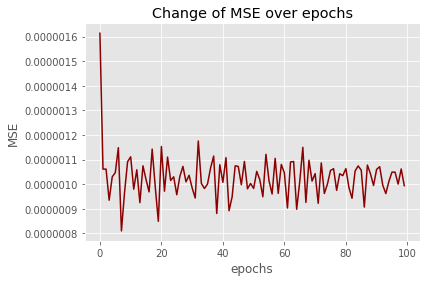

In [13]:
EPOCH=100  ## 학습횟수 정하기
# 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs = EPOCH, verbose = 2)

from sklearn.metrics import r2_score; import matplotlib.pyplot as plt
# 5. 학습과정 살펴보기
plt.plot(range(EPOCH), hist.history['loss'], label='Mean Square Errors', color='darkred')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Change of MSE over epochs')
plt.show()

# 학습된 파라미터 출력

In [14]:
print(model.layers[0].get_weights())


[array([[ 1.0006069],
       [-1.9993892]], dtype=float32), array([3.0003648], dtype=float32)]


# 예측하기

In [12]:
 
x_new= x_test[0:5]; print('X');print(np.round(x_new,2)); 
yhat = model.predict(x_new)
print('predicted value'); print(np.round(yhat,2))
print('true value'); print(np.round(y_test[0:5],2))
## EOF


X
[[0.32 0.24]
 [0.71 0.59]
 [0.35 0.45]
 [0.32 0.56]
 [0.18 0.44]]
predicted value
[[2.84]
 [2.53]
 [2.45]
 [2.21]
 [2.29]]
true value
[2.84 2.52 2.45 2.21 2.29]


# 불확실성의 탐험
사실 우리는 f(X)의 형태를 알지 못합니다. 적절한 네트워크의 구조를 찾아, 충분히 학습하는 것이 필요합니다. 
